<center> <img src="https://www.ufrn.br/resources/documentos/identidadevisual/brasao/brasao_flat.png" width="100" height="100"> </center>

# **<center> IMPLEMENTAÇÃO DE REDES NEURAIS MLP - FASHION MNIST <center>**
    
---

**Disciplina:** Tópicos Especiais em Inteligência Artificial

**Docente:** José Alfredo

**Discentes:**
* [Douglas Wilian](https://github.com/Douglas-Wilian)
* [Roger José](https://github.com/rogerdox)

## **INTRODUÇÃO**

   O presente trabalho tem por objetivo a implementação de redes neurais multilayer perceptron (MLP) utilizando a base de dados Fashion Mnist. Ela possui uma grande quantidade de arquivos de imagens contendo referências visuais acerca de diferentes categorias de roupas.
   De forma incial, o projeto é subdivido em algumas partes: visualização e pré-processamento dos dados, implementação usando os algoritmos disponíveis na Scikit-Learn, implementação utilizando tensorflow/keras, assim como a implementação completa do algoritmo. Todas essas etapas tem como intuito a comparação dos resultados obtidos e a absorção das diferentes formas de aplicar o método de classificação.

## **PARTE I - ABERTURA DA BASE E VISUALIZAÇÃO DOS DADOS**

A plataforma Kaggle foi escolhida para essa implementação já que a mesma possui compatibilidade com diversas bases de dados sem a necessidade de download ou upload dos arquivos. Dessa forma, os dados foram acessados através de seus diretórios e os arquivos de imagem foram importados para um dataframe de forma a permitir a visualização das imagens para treinamento e teste.

## **IMPORTAÇÃO DA BASE DE DADOS**

In [1]:
#CARREGAMENTO DAS BIBLIOTECAS ESSENCIAIS

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_treino = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
df_teste = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

display(df_treino.head())
df_teste.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **VISUALIZAÇÃO DOS DADOS**

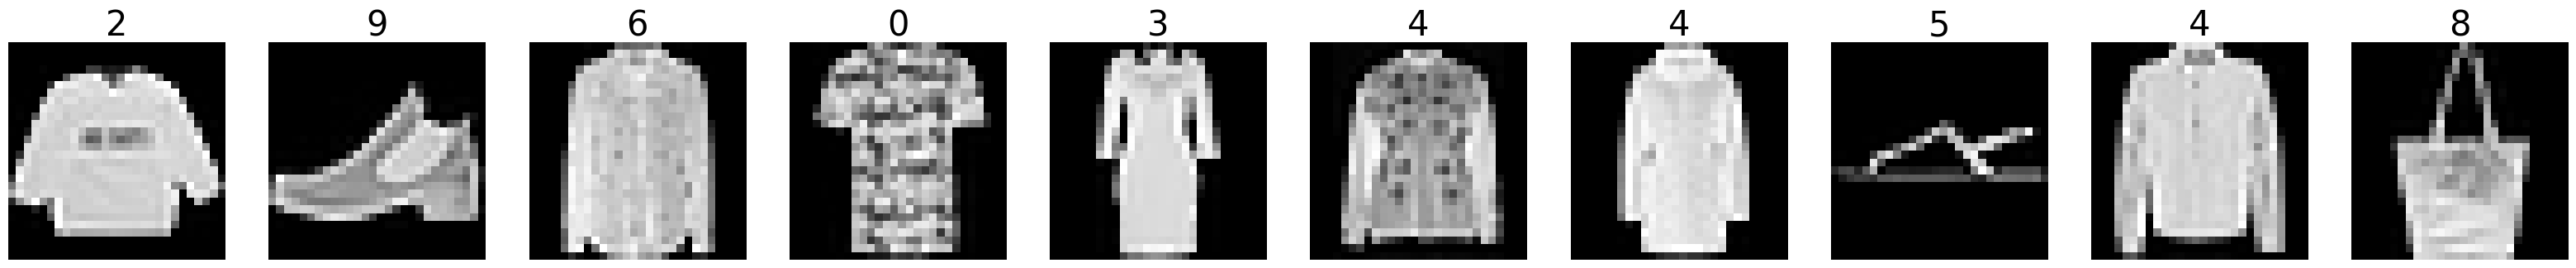

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 10
for i in range(num_images):
    row = df_treino.drop('label', axis=1).values[i]
    label = df_treino['label'].values[i]
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

## **PARTE II - SEPARAÇÃO DOS DADOS E NORMALIZAÇÃO**

A normalização dos dados é de suma importância para a aplicação de redes MLP e diversos métodos de classificação. Através dela é possível retirar a grande variabilidade dos dados mantendo-os em faixas de valores "padrão" para todas as variáveis.

In [3]:
#VERIFICACAO DA QUANTIDADE DE CLASSES

print(df_treino['label'].unique())

[2 9 6 0 3 4 5 8 7 1]


In [4]:
#SEPARACAO DO X E Y DE TREINO E VALIDACAO

xtreino = df_treino.drop('label', axis=1).values
ytreino = df_treino['label'].values
xval = df_teste.drop('label', axis = 1).values
yval = df_teste['label'].values

In [5]:
#VERIFICACAO DOS VALORES MAXIMO E MINIMO

print(xtreino.max())
print(xtreino.min())

255
0


In [6]:
# Mantenha a normalização apenas nos dados de entrada
xtreino = xtreino / 255
xval = xval / 255

print(f'Valores treinamento {xtreino.shape}, {ytreino.shape}')
print(f'Valores validação {xval.shape}, {yval.shape}')

Valores treinamento (60000, 784), (60000,)
Valores validação (10000, 784), (10000,)


## **IMPLEMENTAÇÃO MLP USANDO TENSORFLOW**

In [7]:
# CATEGORIZACAO DAS CLASSES
import tensorflow.keras as keras
num_classes = 10

ytreino = keras.utils.to_categorical(ytreino, num_classes)
yval = keras.utils.to_categorical(yval, num_classes)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xtreino, ytreino, epochs=20, verbose=1, validation_data=(xval, yval))

Epoch 1/20
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4700 - accuracy: 0.8291 - val_loss: 0.3994 - val_accuracy: 0.8521
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3594 - accuracy: 0.8676 - val_loss: 0.3471 - val_accuracy: 0.8747
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3239 - accuracy: 0.8805 - val_loss: 0.3381 - val_accuracy: 0.8752
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3026 - accuracy: 0.8884 - val_loss: 0.3116 - val_accuracy: 0.8883
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2840 - accuracy: 0.8940 - val_loss: 0.3059 - val_accuracy: 0.8892
Epoch 6/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2678 - accuracy: 0.8990 - val_loss: 0.3059 - val_accuracy: 0.8906
Epoch 7/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2540 - accuracy: 0.9046 - val_loss: 0.2997 - val_ac

In [10]:
i = np.random.permutation(df_teste.shape[0])
d = int(0.4*len(i))

test = i[:d]
cjtest = df_teste.loc[test,:]
y = (cjtest['label'].values)
x = (cjtest.drop('label', axis = 1).values)/255

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
ypred = model.predict(x)

ypred

125/125 [==============================] - 0s 3ms/step


array([[3.88153084e-02, 1.38956557e-05, 6.19822787e-03, ...,
        3.69743103e-09, 1.18386597e-05, 5.00486630e-09],
       [3.69811850e-03, 1.83415789e-08, 9.87679839e-01, ...,
        7.22129171e-13, 3.89236625e-08, 3.30245305e-14],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.46323902e-05, 6.76982891e-05, 2.00078432e-02, ...,
        1.07185464e-07, 1.29847776e-05, 7.87849714e-08],
       [7.75022745e-01, 1.00308533e-07, 1.53472195e-06, ...,
        1.17033194e-17, 3.73201594e-08, 6.58546941e-15],
       [1.52776194e-10, 1.18779999e-13, 5.90746503e-18, ...,
        4.19700152e-18, 9.99999940e-01, 1.39957170e-15]], dtype=float32)

In [11]:
predicted_classes = np.argmax(ypred, axis=1)

accuracy = accuracy_score(y, predicted_classes)

print(f'A acurácia do modelo foi de {accuracy*100:.4f} %')

A acurácia do modelo foi de 89.8750 %


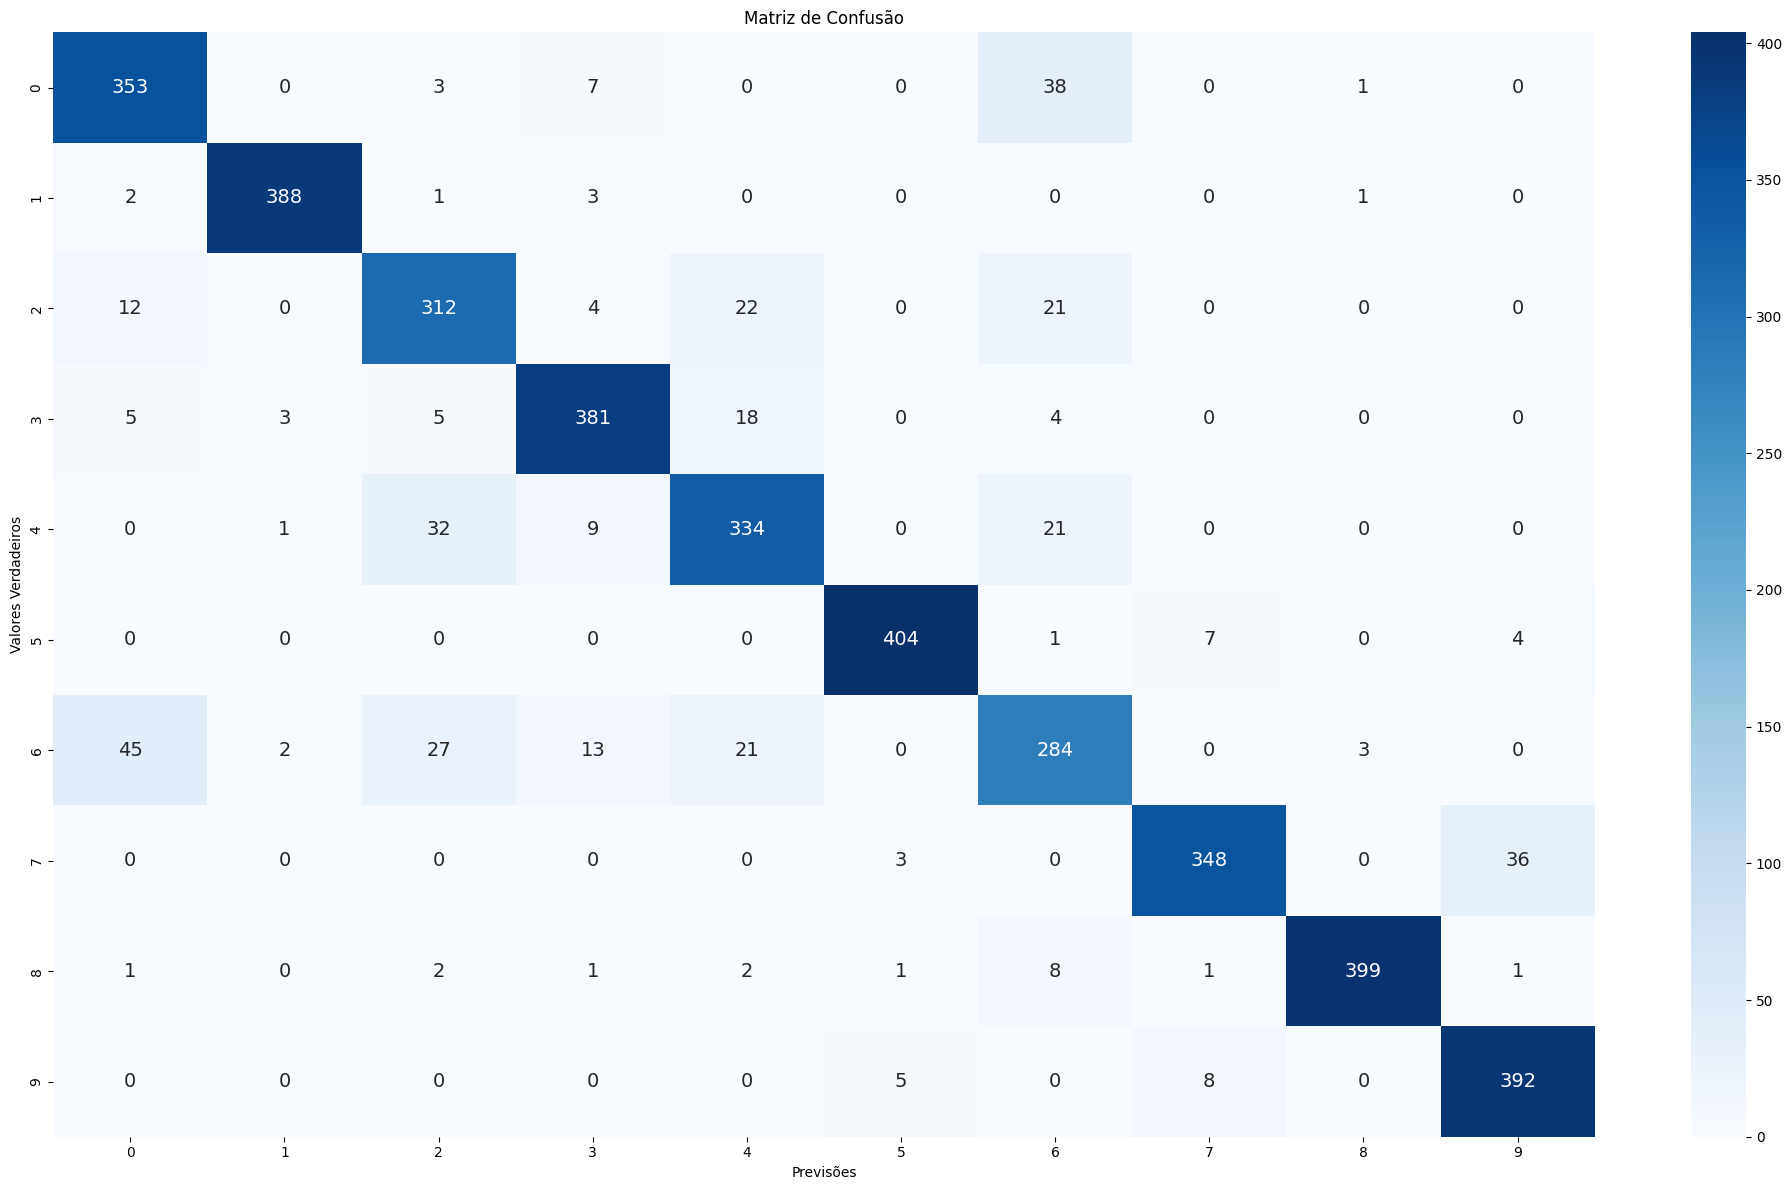

In [12]:
cm = confusion_matrix(y, predicted_classes)

plt.figure(figsize=(20, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.savefig('Matriz de confusão.png', dpi = 600)
plt.show()